In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

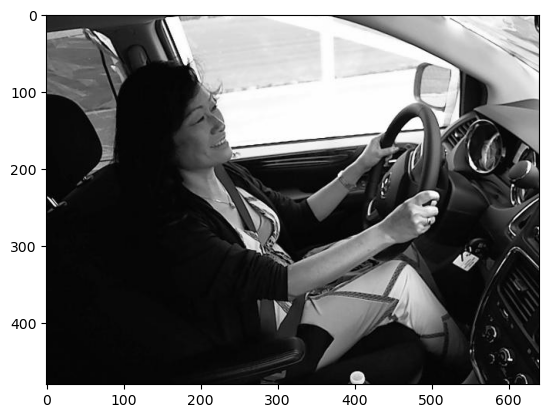

In [2]:
# corrected the label errors 
# class_labels = {
#     0: 'normal_driving',
#     1: 'texting_right',
#     2: 'talking_on_the_phone_right',
#     3: 'texting_left',
#     4: 'talking_on_the_phone_left',
#     5: 'operating_the_radio',
#     6: 'drinking',
#     7: 'reaching_behind',
#     8: 'hair_and_makeup',
#     9: 'talking_to_passenger'
# }

# turned to 8 classes manually
# class_labels = {
#     0: 'normal_driving',
#     1: 'texting',
#     2: 'talking_on_the_phone',
#     3: 'operating_the_radio',
#     4: 'drinking',
#     5: 'reaching_behind',
#     6: 'hair_and_makeup',
#     7: 'talking_to_passenger'
# }

# base directory where the dataset (train set) is located.
base_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetectFinal/label_error_corrected_dataset/train'

# analyze images
img_array = cv2.imread(base_dir + '/c0/img_2101.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(cv2.cvtColor(img_array,  cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
img_array.shape

(480, 640)

In [4]:
# Determine the minimum count among all classes
min_class_count = float('inf')  # Initialize with a large value

# Create a list to store selected and augmented images
traindata = []

# Iterate through the class folders
for class_folder in os.listdir(base_dir):
    class_folder_path = os.path.join(base_dir, class_folder)
    
    if os.path.isdir(class_folder_path):
        # List all image files in the class folder
        image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        # Update the minimum class count
        min_class_count = min(min_class_count, len(image_files))

In [5]:
min_class_count

1803

In [6]:
img_size = 224
# Randomly select min_class_count images from each class
for class_folder in os.listdir(base_dir):
    class_folder_path = os.path.join(base_dir, class_folder)

    if os.path.isdir(class_folder_path):
        image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        # Randomly select 1000 images from each class
        selected_images = np.random.choice(image_files, size=min_class_count, replace=False)

        # Loop through the selected images
        for image_file in selected_images:
            image_path = os.path.join(class_folder_path, image_file)

            # Read the image
            image = cv2.imread(image_path)
            back_to_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(back_to_rgb, (img_size, img_size))

            # Flip the image horizontally
            flipped_image = cv2.flip(new_img_array, 1)

            # Append the original and flipped images to the training data
            traindata.append([new_img_array, int(class_folder[1:])])  # Extract the class index from folder name
            traindata.append([flipped_image, int(class_folder[1:])])

In [7]:
len(traindata)

28848

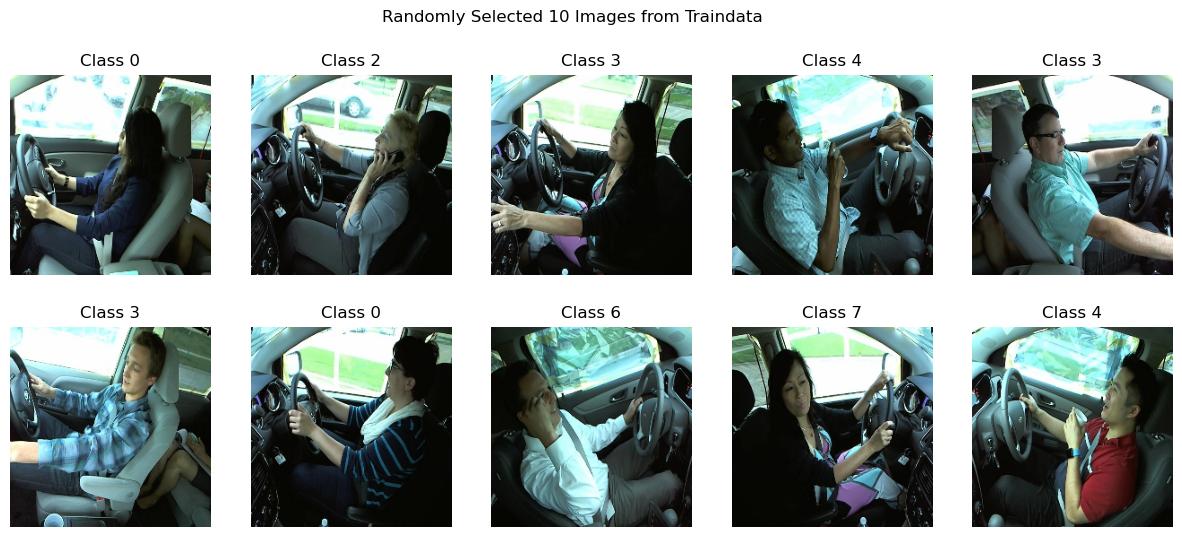

In [8]:
# Randomly select 10 indices
random_indices = np.random.choice(len(traindata), size=10, replace=False)

# Plot the randomly selected 10 images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Randomly Selected 10 Images from Traindata')

for i in range(2):
    for j in range(5):
        index = random_indices[i * 5 + j]
        image, label = traindata[index]

        # Check if the image is in BGR format, convert to RGB
        if image.shape[-1] == 3 and image.shape[-2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axs[i, j].imshow(image)
        axs[i, j].set_title(f'Class {label}')
        axs[i, j].axis('off')

plt.show()

In [9]:
# Apply random contrast and brightness changes to a random selection of 500 samples from each class
for class_index in range(8):  # there are 8 classes
    class_samples = [idx for idx, item in enumerate(traindata) if item[1] == class_index]
    selected_indices = np.random.choice(class_samples, size=500, replace=False)

    for idx in selected_indices:
        image, label = traindata[idx]
        contrast_factor = np.random.uniform(0.5, 1.5)
        brightness_factor = np.random.uniform(-50, 50)

        # Apply contrast and brightness changes
        new_image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=brightness_factor)
        traindata.append([new_image, label])

# Shuffle the training data
np.random.shuffle(traindata)

In [10]:
len(traindata)

32848

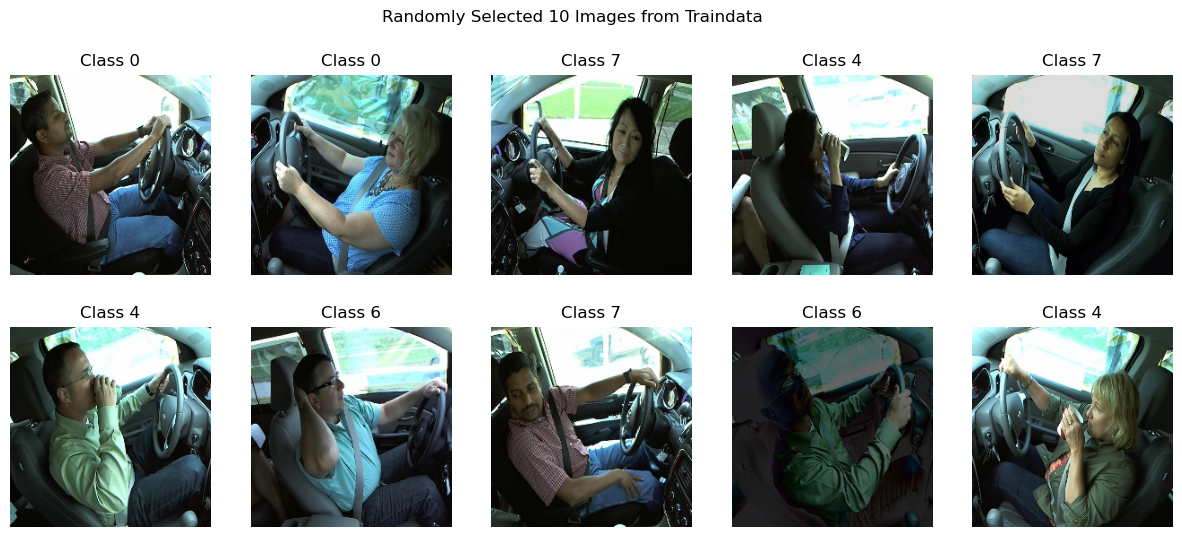

In [11]:
# Randomly select 10 indices
random_indices = np.random.choice(len(traindata), size=10, replace=False)

# Plot the randomly selected 10 images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Randomly Selected 10 Images from Traindata')

for i in range(2):
    for j in range(5):
        index = random_indices[i * 5 + j]
        image, label = traindata[index]

        # Check if the image is in BGR format, convert to RGB
        if image.shape[-1] == 3 and image.shape[-2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axs[i, j].imshow(image)
        axs[i, j].set_title(f'Class {label}')
        axs[i, j].axis('off')

plt.show()

In [12]:
from collections import Counter

# Extract the labels from traindata
labels = [data[1] for data in traindata]

# Count the occurrences of each label
label_counts = Counter(labels)

# Print the counts for each label
for label, count in label_counts.items():
    print(f"Class {label}: {count} samples")

Class 7: 4106 samples
Class 3: 4106 samples
Class 5: 4106 samples
Class 4: 4106 samples
Class 2: 4106 samples
Class 6: 4106 samples
Class 1: 4106 samples
Class 0: 4106 samples


In [13]:
del fig
del axs
del random_indices
del labels
del label_counts

In [14]:
X = []
y = []
img_size = 224

for features, labels in traindata:
    X.append(features)
    y.append(labels)

# reshape
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [15]:
# free up memory
del traindata

In [16]:
X.shape, y.shape

((32848, 224, 224, 3), (32848,))

In [17]:
# Save X and y as separate files.
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetectFinal/saved_data/features_and_labels/'
np.save(save_dir + 'X.npy', X)
np.save(save_dir + 'y.npy', y)

2

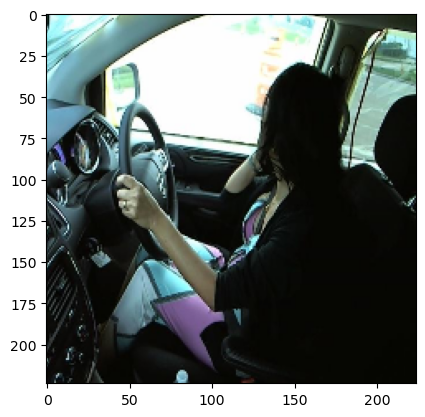

In [18]:
plt.imshow(X[5025], cmap="gray")
y[5025]

In [19]:
# train, validation split
from sklearn.model_selection import train_test_split

# Split the data into train and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the temporary set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(26278, 224, 224, 3) (3285, 224, 224, 3) (3285, 224, 224, 3) (26278,) (3285,) (3285,)


In [21]:
# free up memory
del X
del y
del X_temp
del y_temp

In [22]:
# Save X_train, X_val, y_train, y_val
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetectFinal/saved_data/splits/'
np.save(save_dir + 'X_train.npy', X_train)
np.save(save_dir + 'X_val.npy', X_val)
np.save(save_dir + 'X_test.npy', X_test)
np.save(save_dir + 'y_train.npy', y_train)
np.save(save_dir + 'y_val.npy', y_val)
np.save(save_dir + 'y_test.npy', y_test)

In [23]:
# Normalizing using mobilNetV2 - preprocess_input method (it normalizes from 0 - 255 to -1 - 1 and returns in float32)
X_train_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
X_val_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_val)
X_test_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

In [24]:
del X_train
del X_val
del y_train
del y_val
del X_test
del y_test

In [25]:
# Save preprocessed X_train, X_val, y_train, and y_val
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetectFinal/saved_data/splits_preprocessed/'
np.save(save_dir + 'X_train.npy', X_train_preprocessed)
np.save(save_dir + 'X_val.npy', X_val_preprocessed)
np.save(save_dir + 'X_test.npy', X_test_preprocessed)

In [26]:
# free up mem
del X_train_preprocessed
del X_val_preprocessed
del X_test_preprocessed